In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_sens_spec(y,pred):
    tp = np.sum(np.logical_and(y,pred==y))
    tn = np.sum(np.logical_and(1-y,pred==y))
    fp = np.sum(np.logical_and(pred,pred!=y))
    fn = np.sum(np.logical_and(1-pred,pred!=y))
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    acc = (tp+tn)/(tp+tn+fp+fn)
    prec = tp/(tp+fp)
    return [sens,spec,acc,prec]

In [3]:
#####-----    Essentially change this here so that X_raw is a
#####-----    numpy array with all WBA frequencies and nothing else
#####-----    y is all the overallPoF

X_raw = pd.read_csv("./Data/OHE_Eth.csv").iloc[:,1:17].to_numpy()
y = pd.read_csv("./Data/OHE_Eth.csv")["OverallPoF"].to_numpy()

In [4]:
from scipy.interpolate import CubicSpline
x_sp = np.arange(16)

cs=CubicSpline(x_sp,X_raw,axis=1)

X_in = cs(x_sp,1)
X_in2 = cs(x_sp,2)
X_in3 = X_in2/((1+X_in**2)**(1.5))

In [5]:
from sklearn.model_selection import train_test_split
rs = 22
tr,t = train_test_split([a for a in range(y.shape[0])],train_size=0.85,random_state=rs)

In [6]:
from itertools import combinations
def get_perms(size,num):
    lis = [a for a in range(size)]
    perms = list(combinations(lis,num+1))
    out = [a[0] for a in perms]
    return perms
def get_all_perms(size):
    lis = []
    for a in range(size):
        lis.append(get_perms(size,a))
    return lis

In [7]:
ps = get_all_perms(17)

i1 = [9]

inds = ps[3][1701]
X = X_in[:,inds]
X = np.hstack((X,X_raw[:,i1]))

ind = ps[5][12076]
X2 = X_in2[:,inds]
X2 = np.hstack((X2,X_raw[:,i1]))

ind = ps[5][12076]
X2 = X_in2[:,inds]
X2 = np.hstack((X2,X_raw[:,i1]))

ind = ps[6][17432]
X3 = X_in3[:,inds]
X3 = np.hstack((X3,X_raw[:,i1]))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

clf = LogisticRegression(C=2,class_weight="balanced",
                         l1_ratio=0,max_iter=1000,
                         penalty='elasticnet',
                         solver = 'saga')
clf.fit(X[tr],y[tr])
print("CSDY")
print(get_sens_spec(y[tr],clf.predict(X[tr])))
print(get_sens_spec(y[t],clf.predict(X[t])))

CSDY
[0.7878787878787878, 0.7588235294117647, 0.7635467980295566, 0.3880597014925373]
[0.8, 0.7741935483870968, 0.7777777777777778, 0.36363636363636365]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

clf = LogisticRegression(C=2,class_weight="balanced",
                         l1_ratio=0,max_iter=1000,
                         penalty='elasticnet',
                         solver = 'saga')
clf.fit(X2[tr],y[tr])
print("CSDDY")
print(get_sens_spec(y[tr],clf.predict(X2[tr])))
print(get_sens_spec(y[t],clf.predict(X2[t])))

CSDDY
[0.696969696969697, 0.7647058823529411, 0.7536945812807881, 0.36507936507936506]
[0.6, 0.7741935483870968, 0.75, 0.3]


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

clf = LogisticRegression(C=2,class_weight="balanced",
                         l1_ratio=0,max_iter=1000,
                         penalty='elasticnet',
                         solver = 'saga')
clf.fit(X3[tr],y[tr])
print("CSK")
print(get_sens_spec(y[tr],clf.predict(X3[tr])))
print(get_sens_spec(y[t],clf.predict(X3[t])))

CSK
[0.696969696969697, 0.7529411764705882, 0.7438423645320197, 0.35384615384615387]
[0.6, 0.7741935483870968, 0.75, 0.3]


In [25]:
clf.coef_

array([[-1.18259335, -1.78430669,  0.533775  ,  1.93893579, -3.05501997]])

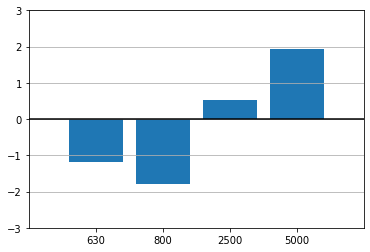

In [44]:
plt.bar(['630','800','2500','5000'],clf.coef_[0][:-1])
plt.plot([-1,4],[0,0],'black')
plt.ylim(-3,3)
plt.xlim(-1,4)
plt.xticks()
plt.grid(axis='y')

In [64]:
probs = clf.predict_proba(X)[:,1]

In [67]:
num_it = len(X)
scs = []
for a in range(num_it):
    for b in range(a+1,num_it):
        pd = np.abs(probs[a]-probs[b])
        fd = np.abs(X[a,4]-X[b,4])
        scs.append([pd,fd,[a,b]])

In [126]:
inds

(4, 5, 10, 13)

In [160]:
4.999999999999449e-04

0.0004999999999999449

0.6092413981269758 1.0
0.4461848594178045 0.0


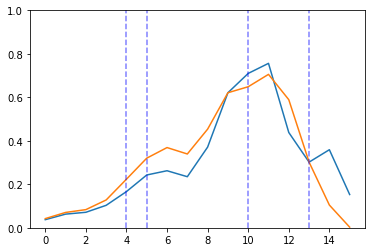

In [157]:
vs = []
for a in range(len(scs)):
    v = scs[a][0]/(scs[a][1]+0.0001)
    vs.append(v)
imp_ind = scs[np.argmax(vs)][2]

plt.plot(X_raw[imp_ind[0]])
plt.plot(X_raw[imp_ind[1]])

plt.plot([4,4],[0,1],'b--',alpha=0.5)
plt.plot([5,5],[0,1],'b--',alpha=0.5)
plt.plot([10,10],[0,1],'b--',alpha=0.5)
plt.plot([13,13],[0,1],'b--',alpha=0.5)

plt.ylim(0,1)

print(probs[imp_ind[0]],y[imp_ind[0]])
print(probs[imp_ind[1]],y[imp_ind[1]])
plt.show()

0.6092413981269758 1.0
0.4461848594178045 0.0


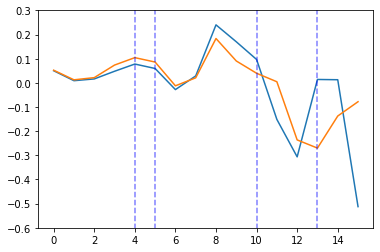

In [154]:
plt.plot(X_in[imp_ind[0]])
plt.plot(X_in[imp_ind[1]])

plt.plot([4,4],[-1,1],'b--',alpha=0.5)
plt.plot([5,5],[-1,1],'b--',alpha=0.5)
plt.plot([10,10],[-1,1],'b--',alpha=0.5)
plt.plot([13,13],[-1,1],'b--',alpha=0.5)

plt.ylim(-0.6,0.3)

print(probs[imp_ind[0]],y[imp_ind[0]])
print(probs[imp_ind[1]],y[imp_ind[1]])
plt.show()

(0.5, 0.9)

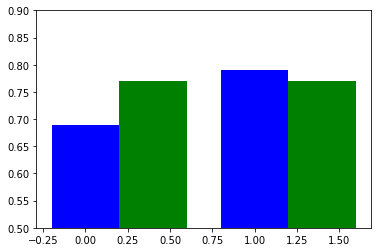

In [125]:
data = np.transpose([baseline,method])
X = np.arange(2)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.4)
plt.bar(X + 0.4, data[1], color = 'g', width = 0.4)
plt.ylim(0.5,0.9)
plt.show()